# [Data Set](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn)

- **RowNumber:** corresponds to the record (row) number and has no effect on the output.
- **CustomerId:** contains random values and has no effect on customer leaving the bank.
- **Surname:** the surname of a customer has no impact on their decision to leave the bank.
- **CreditScore:** can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- **Geography:** a customer’s location can affect their decision to leave the bank.
- **Gender:** it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- **Age:** this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- **Tenure:** refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- **Balance:** also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- **NumOfProducts:** refers to the number of products that a customer has purchased through the bank.
- **HasCrCard:** denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- **IsActiveMember:** active customers are less likely to leave the bank.
- **EstimatedSalary:** as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- **Exited:** whether or not the customer left the bank.
- **Complain:** customer has complaint or not.
- **Satisfaction Score:** Score provided by the customer for their complaint resolution.
- **Card Type:** type of card hold by the customer.
- **Points Earned:** the points earned by the customer for using credit card.

In [73]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Utils
from src.plot_function import *


custom_palette = {
    'Left': '#c53b53',
    'Non-Left': '#394b70'
}
sns.color_palette(list(custom_palette.values()))

[(0.7725490196078432, 0.23137254901960785, 0.3254901960784314),
 (0.2235294117647059, 0.29411764705882354, 0.4392156862745098)]

In [74]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, KFold

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, matthews_corrcoef, cohen_kappa_score

In [75]:
from imblearn.over_sampling import SMOTE
from scipy.stats import mstats

import catboost as cb
import lightgbm as lgb
import xgboost as xgb
import optuna
import shap

In [76]:
df = pd.read_csv('data/Customer-Churn-Records.csv')
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0             1               1        101348.88       1         1   
1             0               1        112542.58       0         1   
2             1               0        113931.57       1         1   
3             0               0         93826.63       0         0   
4             1               1         79084.10       0         0   
...         ...             ...              ...     ...       ...   
9995          1               0         96270.64       0         0   
9996          1               1        101699.77       0         0   
9997          0               1         42085.58       1         1   
9998          1               0         92888.52       1         1   
9999          1               0         38190.78       0         0   

      Satisfaction Score Card Type  Point Earned  
0                      2   DIAMOND           464  
1                      3   DIAMOND           456  
2                      3   DIAMOND           377  
3                      5      GOLD           350  
4                      5      GOLD           425  
...                  ...       ...           ...  
9995                   1   DIAMOND           300  
9996                   5  PLATINUM           771  
9997                   3    SILVER           564  
9998                   2      GOLD           339  
9999                   3   DIAMOND           911  

[10000 rows x 15 columns]

In [77]:
df.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  \
count  10000.00000    10000.000000     10000.000000  10000.000000   
mean       0.70550        0.515100    100090.239881      0.203800   
std        0.45584        0.499797     57510.492818      0.402842   
min        0.00000        0.000000        11.580000      0.000000   
25%        0.00000        0.000000     51002.110000      0.000000   
50%        1.00000        1.000000    100193.915000      0.000000   
75%        1.00000        1.000000    149388.247500      0.000000   
max        1.00000        1.000000    199992.480000      1.000000   

           Complain  Satisfaction Score  Point Earned  
count  10000.000000        10000.000000  10000.000000  
mean       0.204400            3.013800    606.515100  
std        0.403283            1.405919    225.924839  
min        0.000000            1.000000    119.000000  
25%        0.000000            2.000000    410.000000  
50%        0.000000            3.000000    605.000000  
75%        0.000000            4.000000    801.000000  
max        1.000000            5.000000   1000.000000

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [79]:
df.duplicated().sum()

0

In [80]:
df.isna().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [81]:
df['Exited_label'] = df['Exited'].map({0: 'Non-Left', 1: 'Left'})

In [82]:
df['Geography'].unique(), df['Gender'].unique(), df['Tenure'].unique()

(array(['France', 'Spain', 'Germany'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0]))

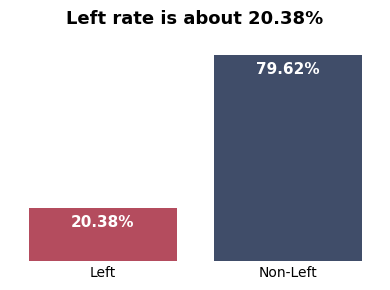

In [83]:
hue='Exited_label'
visualizer = DataVisualizer(df)
visualizer.plot_seaborn_bar(custom_palette=custom_palette, hue=hue)

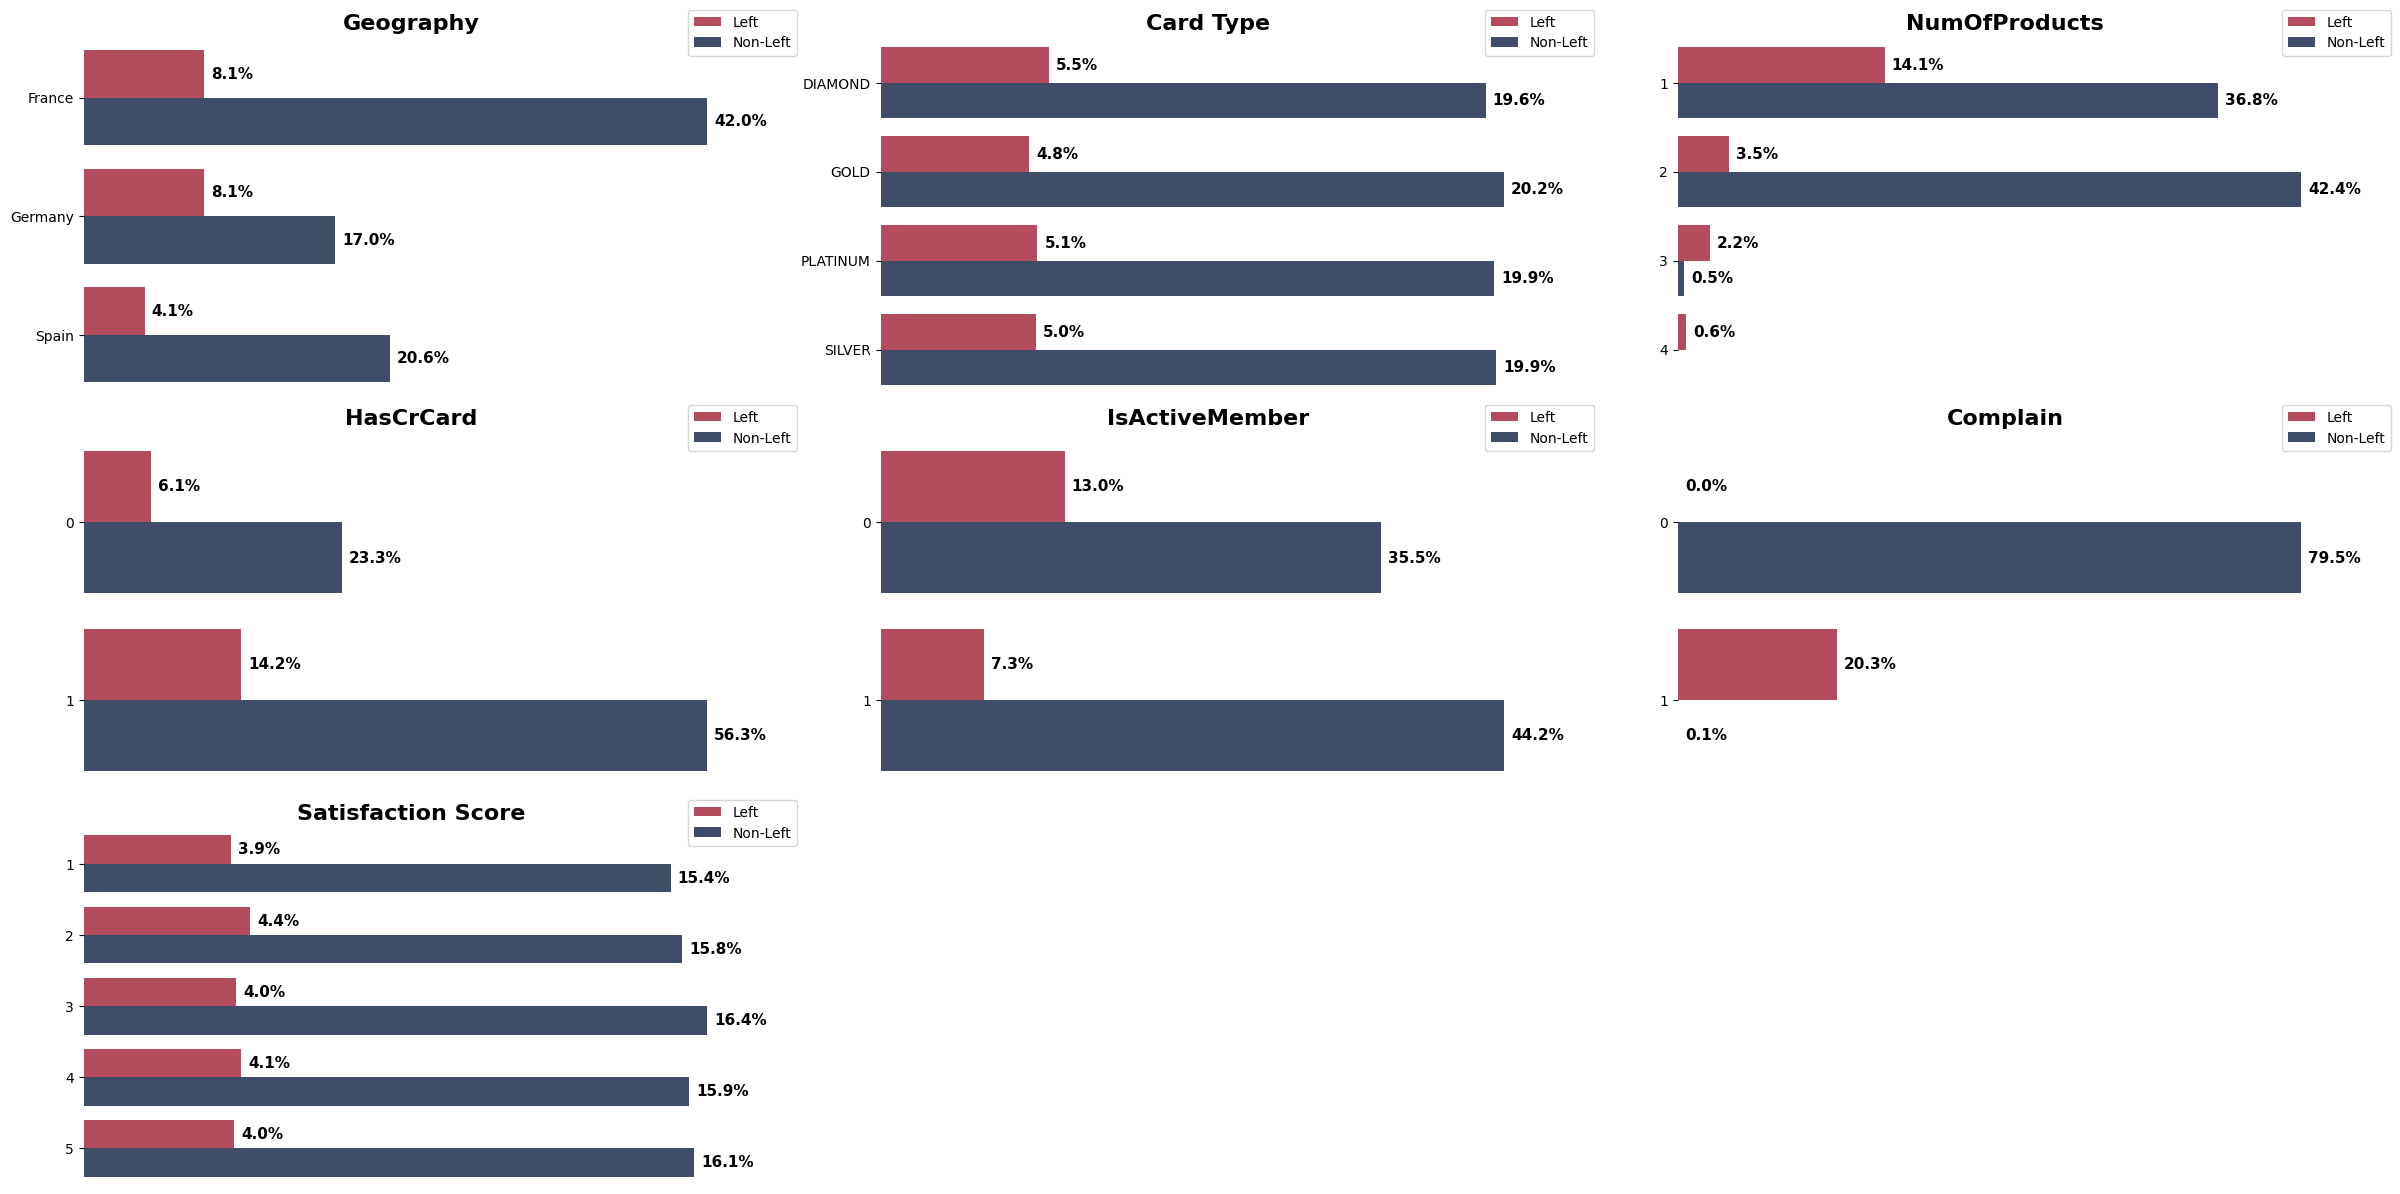

In [84]:
barplot_features = ['Geography', 'Card Type', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Complain', 'Satisfaction Score']

hue = 'Exited_label'

visualizer = DataVisualizer(df)
visualizer.plot_barplot(barplot_features, hue=hue, custom_palette=custom_palette)

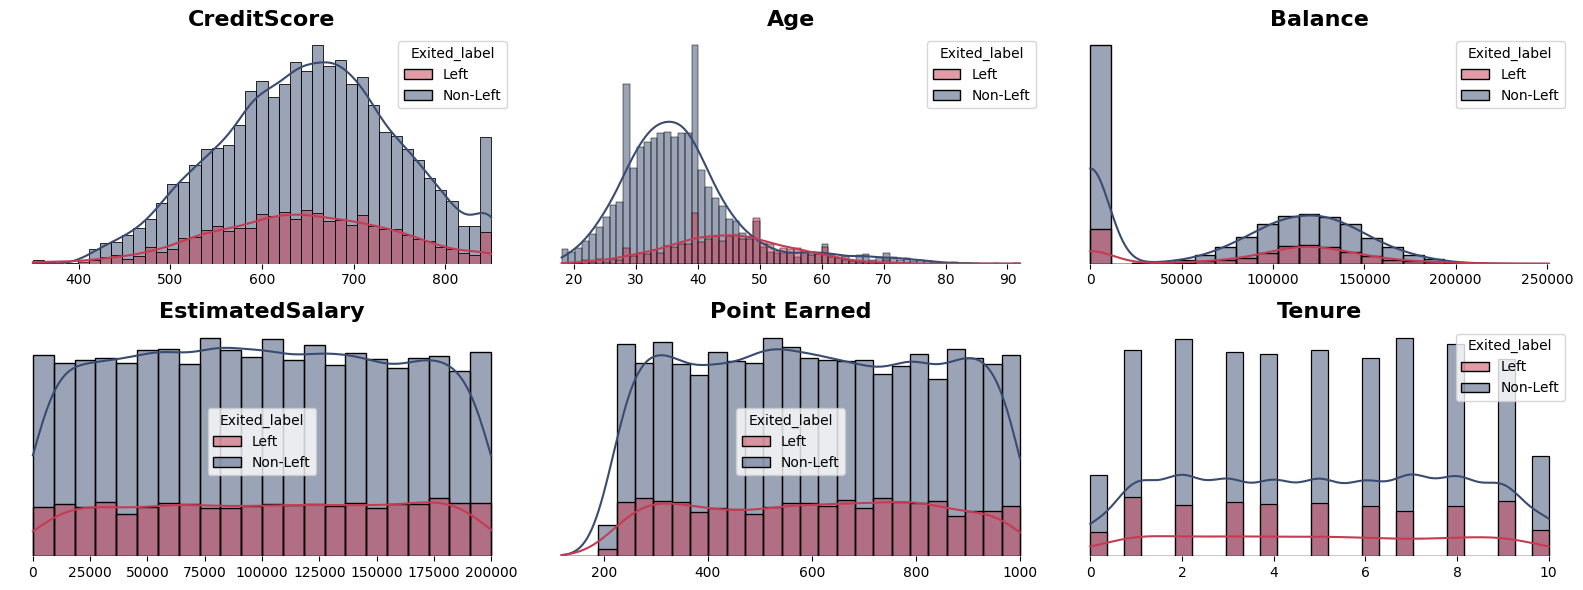

In [85]:
histogram_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned', 'Tenure']

hue_choice='Exited_label'
visualizer = DataVisualizer(df, figsize=(16, 6))
visualizer.plot_histplot(features=histogram_features, custom_palette=custom_palette, hue=hue_choice, kde=True)

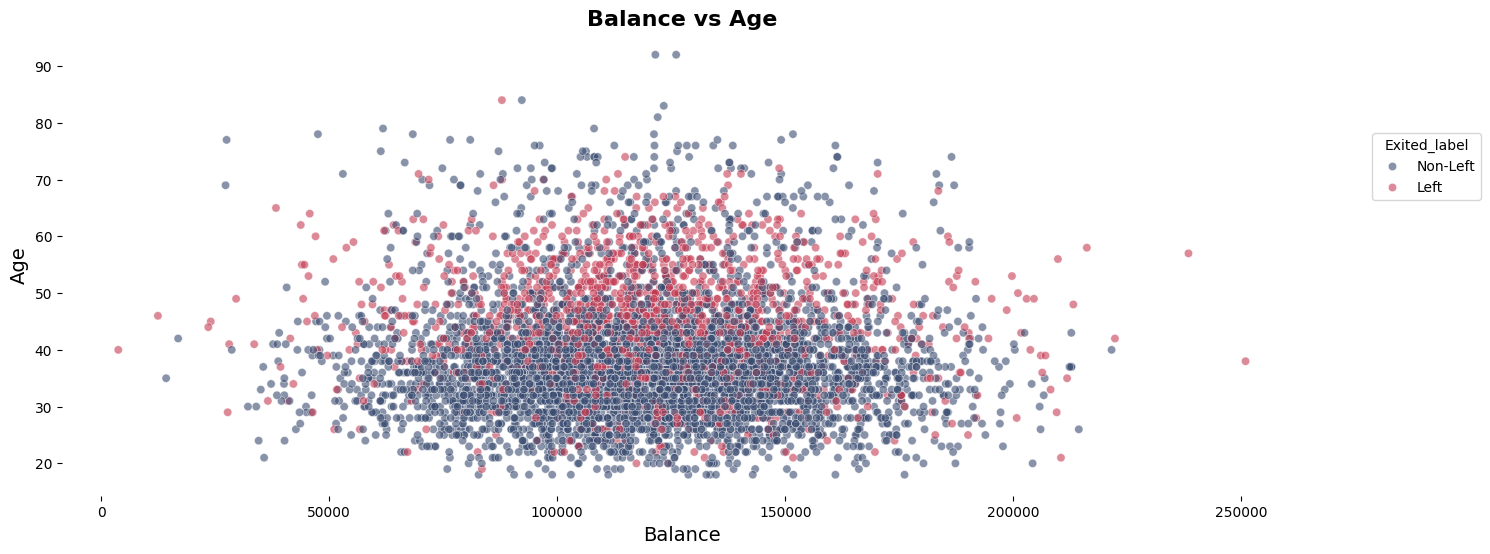

In [86]:
y = 'Age'
x = 'Balance'
hue = 'Exited_label'
df_filtered = df.loc[~(df[['Balance']] == 0).any(axis=1)]
visualizer = DataVisualizer(df_filtered)
visualizer.plot_custom_scatterplot(x=x, y=y, hue=hue, custom_palette=custom_palette)

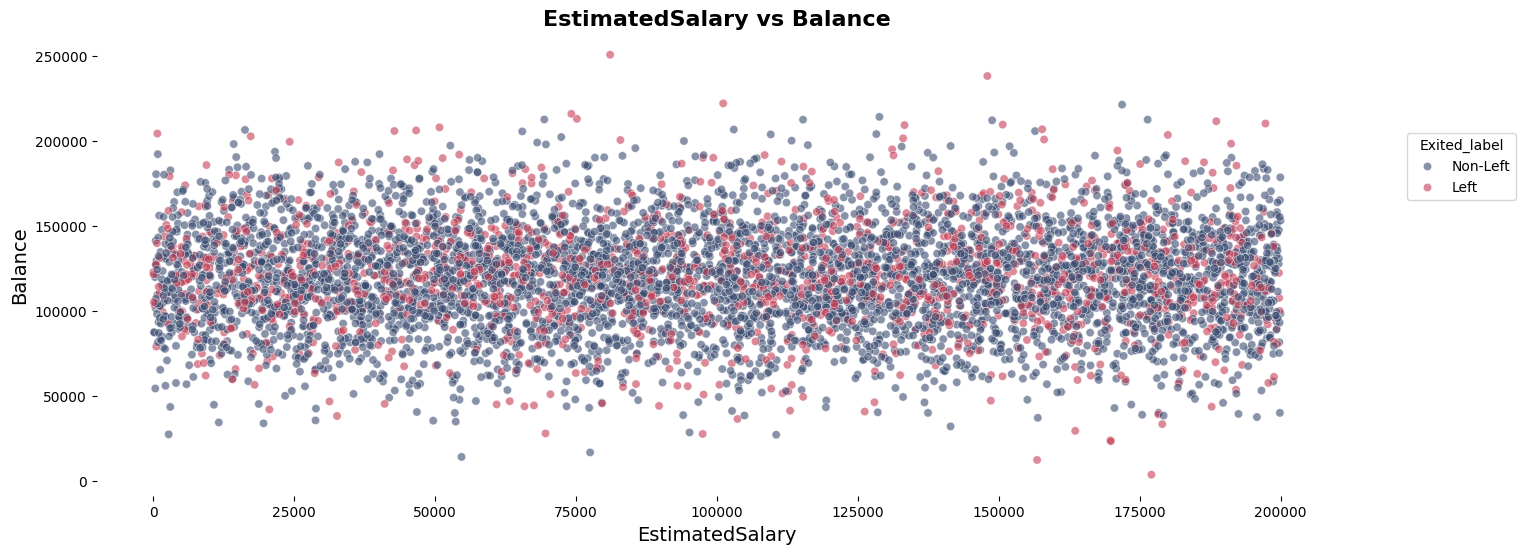

In [87]:
x = 'EstimatedSalary'
y = 'Balance'
hue = 'Exited_label'
# df_filtered = df.loc[~(df[['Balance']] == 0).any(axis=1)]
visualizer = DataVisualizer(df_filtered)
visualizer.plot_custom_scatterplot(x=x, y=y, hue=hue, custom_palette=custom_palette)

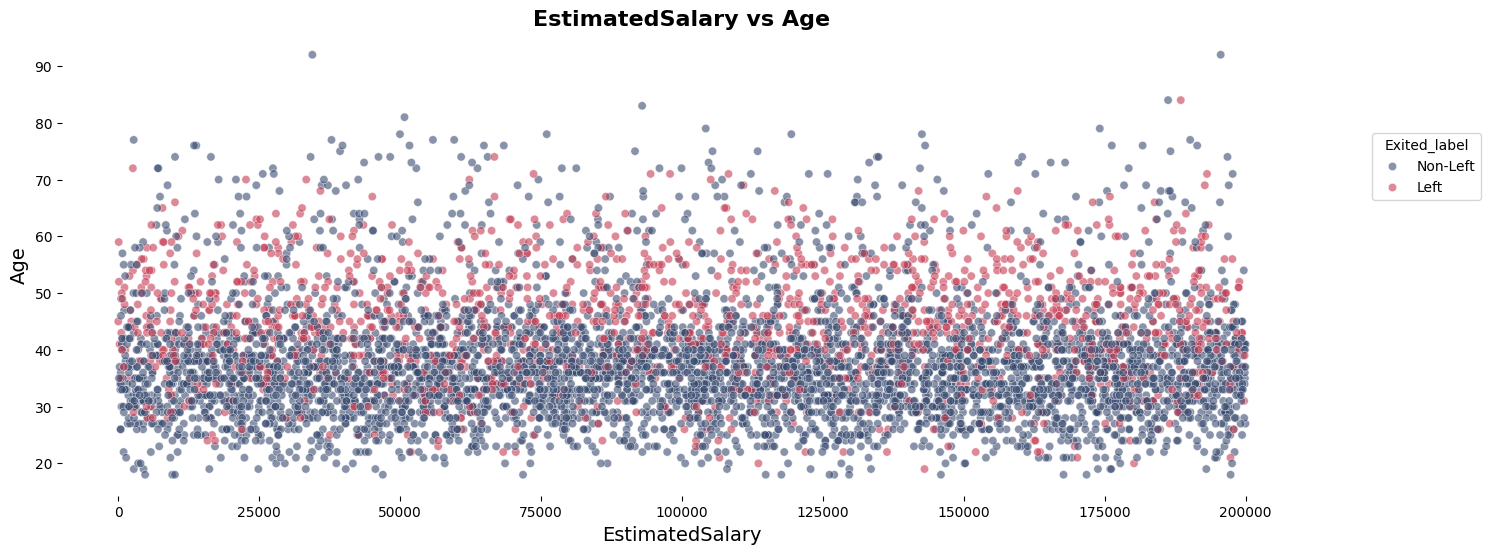

In [88]:
y = 'Age'
x = 'EstimatedSalary'
hue = 'Exited_label'

visualizer = DataVisualizer(df_filtered)
visualizer.plot_custom_scatterplot(x=x, y=y, hue=hue, custom_palette=custom_palette)

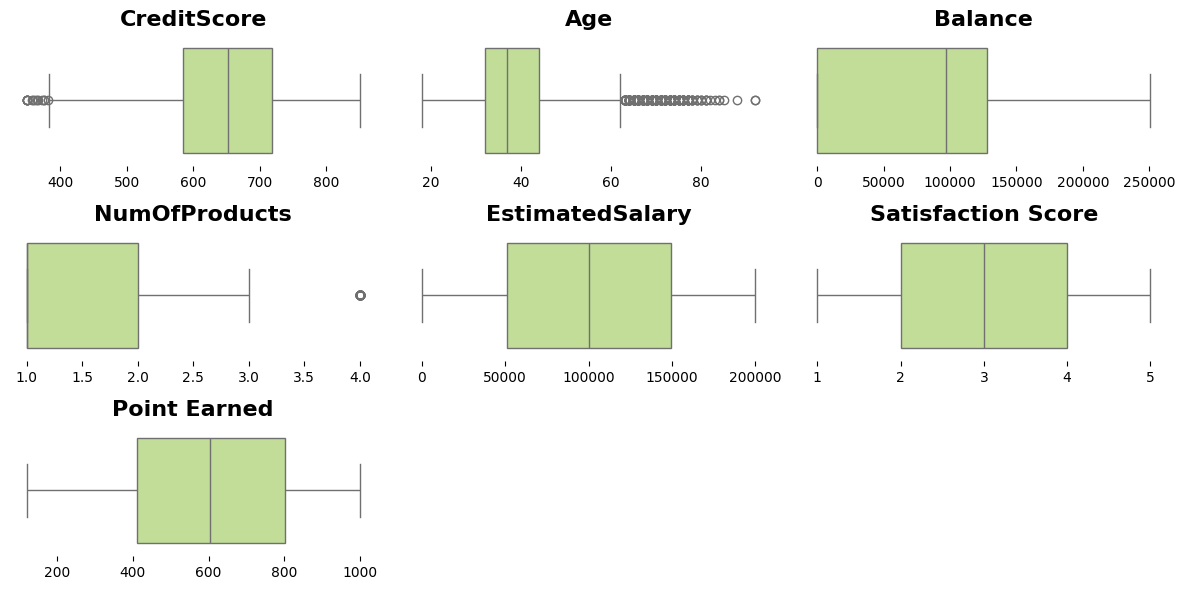

In [89]:
boxplot_features = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']

# data_visualizations(df, boxplot_features, boxplot=True, figsize=(12, 6))

visualizer = DataVisualizer(df, figsize=(12, 6))
visualizer.plot_boxplot(features=boxplot_features)

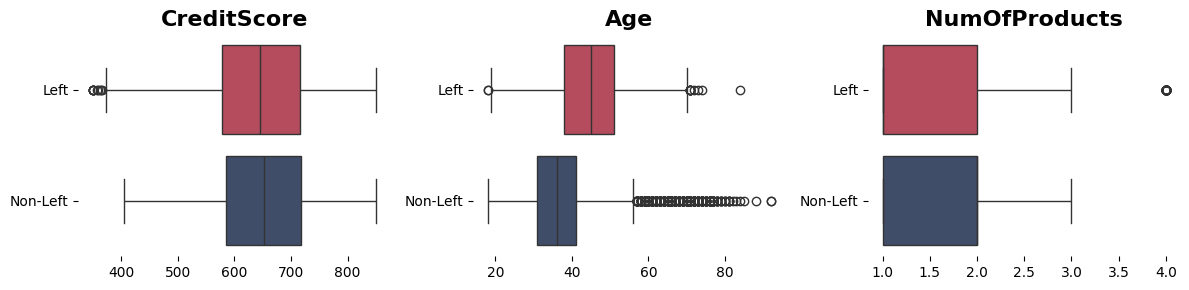

In [90]:
boxplot_features = ['CreditScore', 'Age', 'NumOfProducts']
hue = 'Exited_label'

visualizer = DataVisualizer(df, figsize=(12, 3))
visualizer.plot_boxplot(features=boxplot_features, hue=hue, custom_palette=custom_palette)

---

# Features Engineer

In [91]:
df_feature = pd.DataFrame()

In [92]:
df_feature['AgeGroup'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=['0-24', '25-34', '35-44', '45-54', '55-64', '65+'])
df_feature['AgeGroup'].unique()

['35-44', '45-54', '25-34', '0-24', '55-64', '65+']
Categories (6, object): ['0-24' < '25-34' < '35-44' < '45-54' < '55-64' < '65+']

In [93]:
df_feature['BalanceCategory'] = pd.cut(df['Balance'], bins=[-float('inf'), 0, 10000, 20000, float('inf')], labels=['Negative', 'Low', 'Medium', 'High'])
df_feature['BalanceCategory'].unique()

['Negative', 'High', 'Medium', 'Low']
Categories (4, object): ['Negative' < 'Low' < 'Medium' < 'High']

In [94]:
df_feature['ProductsActive'] = df['NumOfProducts'] * df['IsActiveMember']
df_feature['ProductsActive'].unique()

array([1, 0, 2, 3, 4])

In [95]:
df_feature['Age_Tenure_Ratio'] = df['Age'] / (df['Tenure'] + 1)  

In [96]:
df_feature['BalanceSalaryRatio'] = df['Balance'] / (df['EstimatedSalary'] + 1)  

In [97]:
df_feature['Log_Balance'] = np.log(df['Balance'] + 1)  
df_feature['Log_EstimatedSalary'] = np.log(df['EstimatedSalary'] + 1)

In [98]:
# df_feature['Gender_Age_Interaction'] = df['Gender'] * df['Age']

In [99]:
df_feature['Tenure_Balance_Interaction'] = df['Tenure'] * df['Balance']

In [100]:
df_feature['Low_Satisfaction'] = np.where(df['Satisfaction Score'] < 3, 1, 0)  # Sinaliza clientes com baixa satisfação

In [101]:
df_feature['Avg_Balance_Per_Geo'] = df.groupby('Geography')['Balance'].transform('mean')

In [102]:
# poly = PolynomialFeatures(degree=4, include_bias=False)
# poly_features = poly.fit_transform(df[['Age', 'Balance']])
# df_poly = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['Age', 'Balance']))
# df_feature = pd.concat([df_feature, df_poly.drop(['Age', 'Balance'], axis=1)], axis=1)
# df_poly

---

# Encoder

## StandardScaler

In [103]:
scaler = StandardScaler()

In [104]:
feature_standard = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Point Earned']

In [105]:
df_feature[feature_standard] = scaler.fit_transform(df[feature_standard])

---

## LabelEncoder

In [106]:
label_encoder = LabelEncoder()

In [107]:
df['Geography_LabelEncoder'] = label_encoder.fit_transform(df['Geography'])
df['Gender_LabelEncoder'] = label_encoder.fit_transform(df['Gender'])
df_feature['Card_Type_label_LabelEncoder'] = label_encoder.fit_transform(df['Card Type'])

---

## OrdinalEncoder

In [108]:
ordinal_encoder = OrdinalEncoder(categories=[['DIAMOND', 'PLATINUM', 'GOLD', 'SILVER']])
df_feature['Card_Type_OrdinalEncoder'] = ordinal_encoder.fit_transform(df[['Card Type']])

In [109]:
ordinal_encoder = OrdinalEncoder(categories=[['High', 'Medium', 'Low', 'Negative']])
df_feature['BalanceCategory_Encoded'] = ordinal_encoder.fit_transform(df_feature[['BalanceCategory']])

In [110]:
ordinal_encoder = OrdinalEncoder(categories=[['65+', '55-64', '45-54', '35-44', '25-34', '0-24']])
df_feature['AgeGroup_Encoded'] = ordinal_encoder.fit_transform(df_feature[['AgeGroup']])

---

In [111]:
df

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0             1               1        101348.88       1         1   
1             0               1        112542.58       0         1   
2             1               0        113931.57       1         1   
3             0               0         93826.63       0         0   
4             1               1         79084.10       0         0   
...         ...             ...              ...     ...       ...   
9995          1               0         96270.64       0         0   
9996          1               1        101699.77       0         0   
9997          0               1         42085.58       1         1   
9998          1               0         92888.52       1         1   
9999          1               0         38190.78       0         0   

      Satisfaction Score Card Type  Point Earned Exited_label  \
0                      2   DIAMOND           464         Left   
1                      3   DIAMOND           456     Non-Left   
2                      3   DIAMOND           377         Left   
3                      5      GOLD           350     Non-Left   
4                      5      GOLD           425     Non-Left   
...                  ...       ...           ...          ...   
9995                   1   DIAMOND           300     Non-Left   
9996                   5  PLATINUM           771     Non-Left   
9997                   3    SILVER           564         Left   
9998                   2      GOLD           339         Left   
9999                   3   DIAMOND           911     Non-Left   

      Geography_LabelEncoder  Gender_LabelEncoder  
0                          0                    0  
1                          2                    0  
2                          0                    0  
3                          0                    0  
4                          2                    0  
...                      ...                  ...  
9995                       0                    1  
9996                       0                    1  
9997                       0                    0  
9998                       1                    1  
9999                       0                    0  

[10000 rows x 18 columns]

## OneHotEncoder

In [112]:
onehotenconder = OneHotEncoder(drop='first', sparse_output=False)

In [113]:
features_OneHotEncoder = ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Satisfaction Score']
# features_OneHotEncoder = ['Geography', 'Card Type']

In [114]:
# one_hot_encoded = onehotenconder.fit_transform(df[features_OneHotEncoder])
ohe_transformed = pd.DataFrame(onehotenconder.fit_transform(df[features_OneHotEncoder]), 
                               columns=onehotenconder.get_feature_names_out(features_OneHotEncoder))
df_feature = pd.concat([df_feature, ohe_transformed], axis=1)

In [115]:
# df_feature = pd.concat([df['Complain'], df_feature], axis=1)
df_feature

Complain AgeGroup BalanceCategory  ProductsActive  Age_Tenure_Ratio  \
0            1    35-44        Negative               1         14.000000   
1            1    35-44            High               1         20.500000   
2            1    35-44            High               0          4.666667   
3            0    35-44        Negative               0         19.500000   
4            0    35-44            High               1         14.333333   
...        ...      ...             ...             ...               ...   
9995         0    35-44        Negative               0          6.500000   
9996         0    25-34            High               1          3.181818   
9997         1    35-44        Negative               1          4.500000   
9998         1    35-44            High               0         10.500000   
9999         0    25-34            High               0          5.600000   

      BalanceSalaryRatio  Log_Balance  Log_EstimatedSalary  \
0               0.000000     0.000000            11.526334   
1               0.744670    11.336294            11.631096   
2               1.401362    11.980813            11.643362   
3               0.000000     0.000000            11.449215   
4               1.587035    11.740155            11.278280   
...                  ...          ...                  ...   
9995            0.000000     0.000000            11.474929   
9996            0.564102    10.957287            11.529790   
9997            0.000000     0.000000            10.647484   
9998            0.808222    11.226260            11.439166   
9999            3.407613    11.776395            10.550376   

      Tenure_Balance_Interaction  Low_Satisfaction  ...  AgeGroup_Encoded  \
0                           0.00                 1  ...               3.0   
1                       83807.86                 0  ...               3.0   
2                     1277286.40                 0  ...               3.0   
3                           0.00                 0  ...               3.0   
4                      251021.64                 0  ...               3.0   
...                          ...               ...  ...               ...   
9995                        0.00                 1  ...               3.0   
9996                   573696.10                 0  ...               4.0   
9997                        0.00                 0  ...               3.0   
9998                   225225.93                 1  ...               3.0   
9999                   520571.16                 0  ...               4.0   

      NumOfProducts_2  NumOfProducts_3  NumOfProducts_4  HasCrCard_1  \
0                 0.0              0.0              0.0          1.0   
1                 0.0              0.0              0.0          0.0   
2                 0.0              1.0              0.0          1.0   
3                 1.0              0.0              0.0          0.0   
4                 0.0              0.0              0.0          1.0   
...               ...              ...              ...          ...   
9995              1.0              0.0              0.0          1.0   
9996              0.0              0.0              0.0          1.0   
9997              0.0              0.0              0.0          0.0   
9998              1.0              0.0              0.0          1.0   
9999              0.0              0.0              0.0          1.0   

      IsActiveMember_1  Satisfaction Score_2  Satisfaction Score_3  \
0                  1.0                   1.0                   0.0   
1                  1.0                   0.0                   1.0   
2                  0.0                   0.0                   1.0   
3                  0.0                   0.0                   0.0   
4                  1.0                   0.0                   0.0   
...                ...                   ...                   ...   
9995               0.0                   0.0            

---

In [116]:
# features_drop = ['Exited', 'Exited_label', 'Geography', 'Gender', 'Card Type', 'CreditScore', 'Complain']
features_drop = ['AgeGroup', 'BalanceCategory']

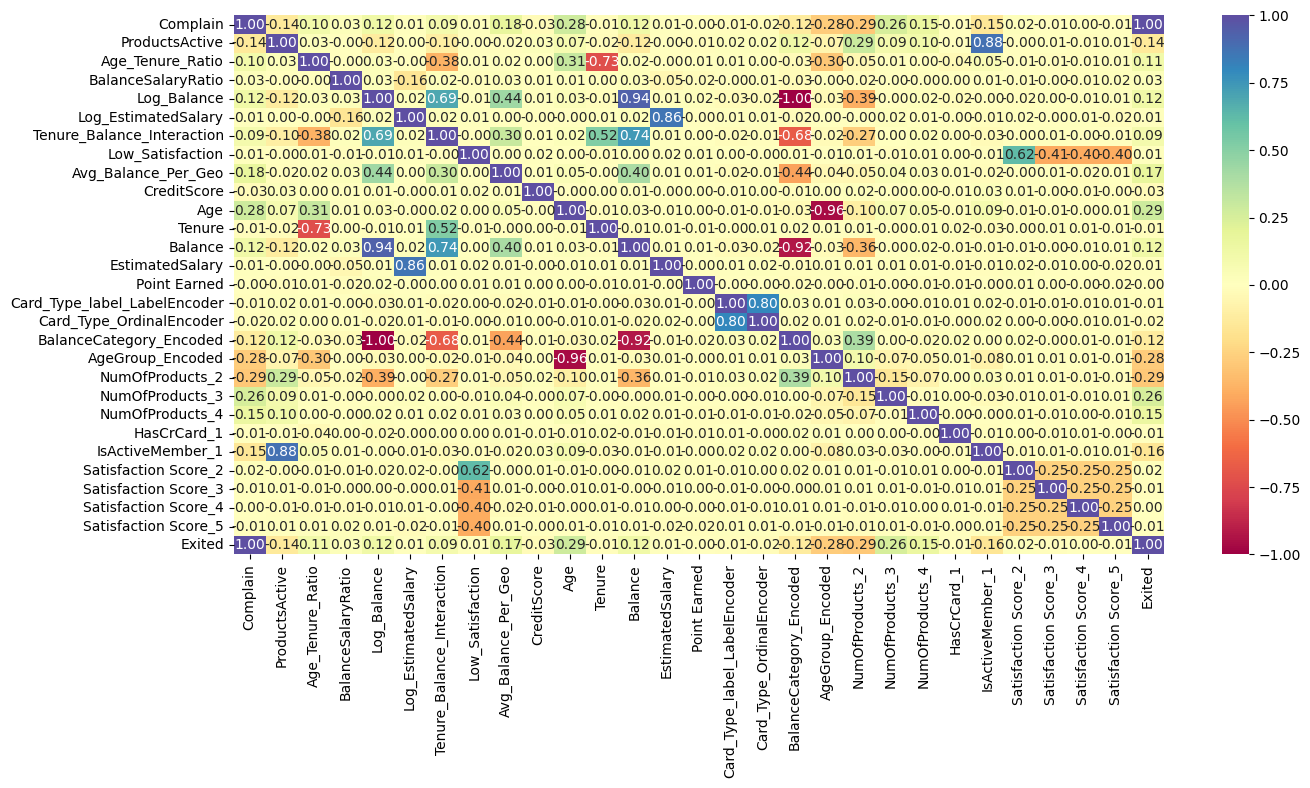

In [117]:
df_corr = df_feature.drop(features_drop, axis=1)
df_corr = pd.concat([df_corr, df['Exited']], axis=1)

plt.figure(figsize=(15, 7))
sns.heatmap(df_corr.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [118]:
# X = df.drop(features_drop, axis=1).values
X = df_feature.drop(features_drop, axis=1).values
y = df['Exited'].values

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42)

In [120]:
# tuner = ClassificationHyperTuner(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, n_trials=100, model_name="catboost")
# best_params, best_auc = tuner.run_optimization()

# print(f"Best Hyperparameters: {best_params}")
# print(f"Best AUC: {best_auc}")

In [121]:
# tuner = ClassificationHyperTuner(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, n_trials=100, model_name="lightgbm")
# best_params, best_auc = tuner.run_optimization()

# print(f"Best Hyperparameters: {best_params}")
# print(f"Best AUC: {best_auc}")

In [122]:
# tuner = ClassificationHyperTuner(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, n_trials=100, model_name="xgboost")
# best_params, best_auc = tuner.run_optimization()

# print(f"Best Hyperparameters: {best_params}")
# print(f"Best AUC: {best_auc}")

In [123]:
# best_params_CatBoostClassifier = {'learning_rate': 0.009952649232798235, 
#                                   'depth': 5, 
#                                   'subsample': 0.8240253552299879, 
#                                   'colsample_bylevel': 0.6859743663506859, 
#                                   'min_data_in_leaf': 47,
#                                   'verbose' : 0}
best_params_CatBoostClassifier = {'iterations': 1053, 
                                  'learning_rate': 0.003943740093485717, 
                                  'depth': 5, 
                                  'subsample': 0.6980564562775959, 
                                  'colsample_bylevel': 0.860129422648846, 
                                  'min_data_in_leaf': 154, 
                                  'l2_leaf_reg': 0.07824341721074222, 
                                  'grow_policy': 'SymmetricTree', 
                                  'border_count': 218, 
                                  'od_type': 'IncToDec',
                                  'verbose' : 0}

model_cb = cb.CatBoostClassifier(**best_params_CatBoostClassifier)

In [124]:
best_params_LGBMClassifier = {'learning_rate': 0.003424337139769617, 
                              'num_leaves': 190, 
                              'subsample': 0.8456990263020869, 
                              'colsample_bytree': 0.6111370967365477, 
                              'min_data_in_leaf': 71,
                              'verbose' : 0}
model_lgb = lgb.LGBMClassifier(**best_params_LGBMClassifier)

In [125]:
best_params_XGBClassifier = {'learning_rate': 0.0011565921292092409, 
                             'max_depth': 6, 
                             'subsample': 0.898789718081241, 
                             'colsample_bytree': 0.5414526843520394, 
                             'min_child_weight': 15}
model_xgb = xgb.XGBClassifier(**best_params_XGBClassifier)

In [126]:
model = model_cb

In [127]:
train = ValidationClassification(model=model, rouc_curve=True, confusion_matrix=True)

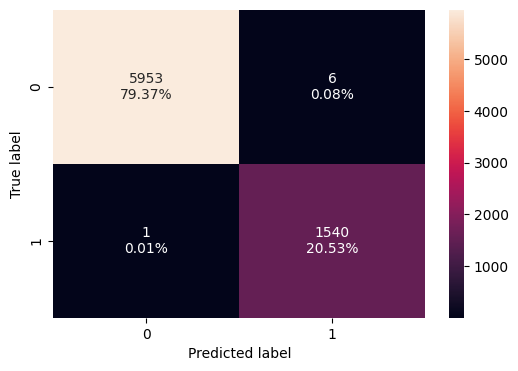

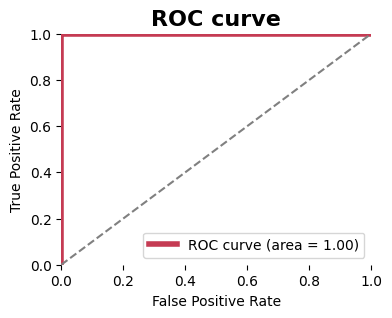

Accuracy  Precision  Recall  F1 Score  ROC AUC  Matthews Corrcoef  \
0     99.91      99.91   99.91     99.91    100.0                1.0   

   Cohen Kappa  Log Loss  
0          1.0       0.2

In [128]:
normal_scores = train.normal(X=X_train, y=y_train)
normal_scores

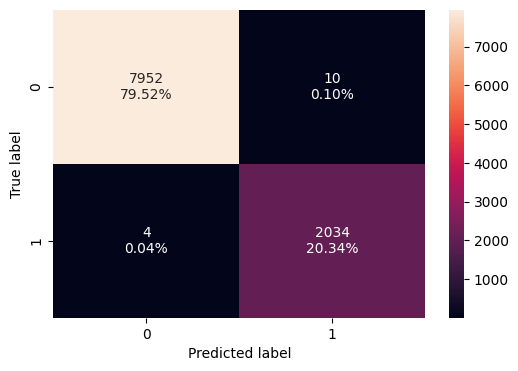

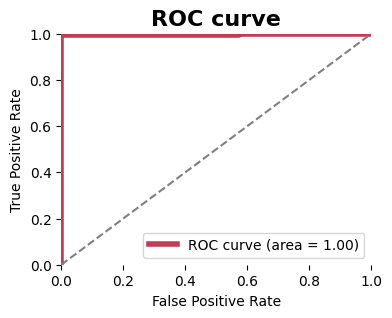

Accuracy  Precision  Recall  F1 Score  ROC AUC  Matthews Corrcoef  \
0     99.86      99.86   99.86     99.86    99.89               0.99   

   Cohen Kappa  Log Loss  
0         0.99       1.0

In [129]:
cross_validation_scores = train.cross(X=X, y=y, n_splits = 10, oversampling=True)
cross_validation_scores

In [130]:
combined_df = pd.concat([normal_scores, 
                         cross_validation_scores, 
                         ], ignore_index=True)
index_names = ['normal', 
               'cross', 
]


combined_df['scores'] = index_names
combined_df = combined_df.set_index('scores')

combined_df.sort_values(by='Log Loss')

Accuracy  Precision  Recall  F1 Score  ROC AUC  Matthews Corrcoef  \
scores                                                                      
normal     99.91      99.91   99.91     99.91   100.00               1.00   
cross      99.86      99.86   99.86     99.86    99.89               0.99   

        Cohen Kappa  Log Loss  
scores                         
normal         1.00       0.2  
cross          0.99       1.0

In [131]:
model.fit(X_train, y_train)

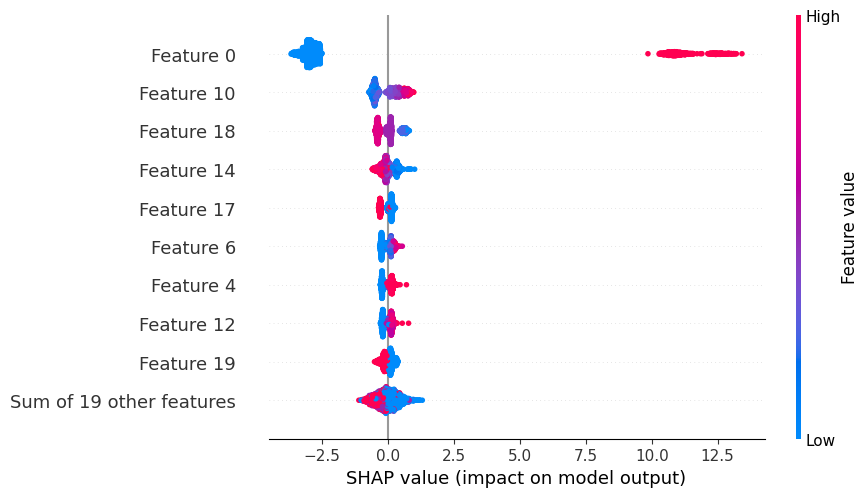

In [132]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)

In [133]:
# Crie um explainer SHAP com base no modelo treinado
explainer = shap.TreeExplainer(model)

# Calcule os valores SHAP para o conjunto de teste
shap_values = explainer.shap_values(X_test)

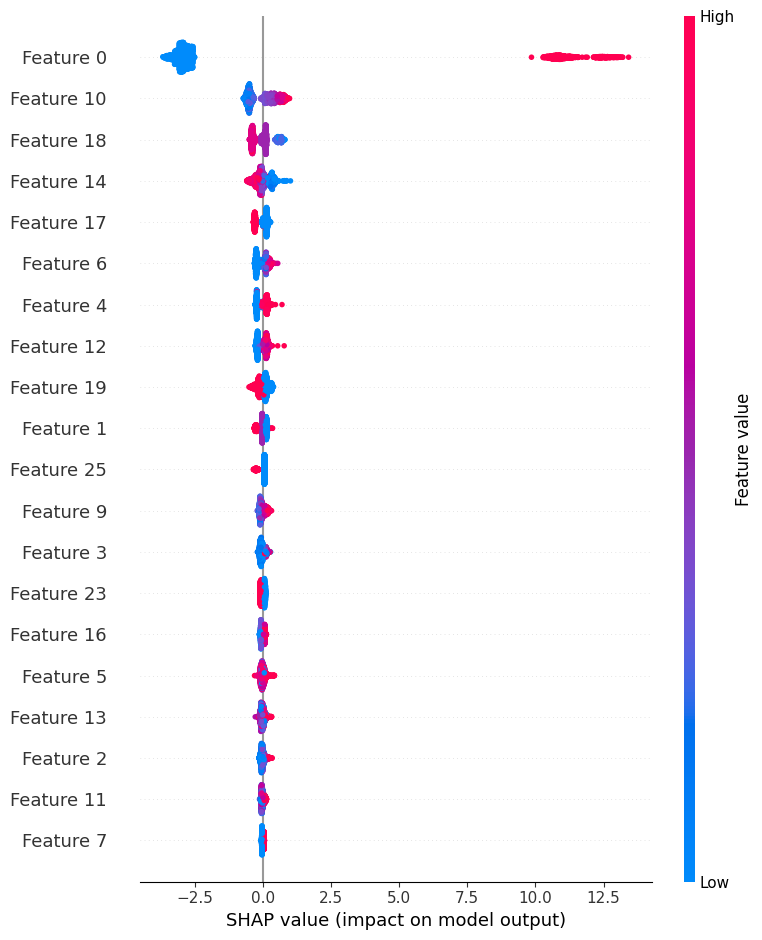

In [134]:
# Gráfico de resumo para ver a importância das features
shap.summary_plot(shap_values, X_test)

In [135]:
# Obter os nomes das features a partir do DataFrame original
feature_names = df_feature.drop(features_drop, axis=1).columns

# Converter X_test para um DataFrame
X_test_df = pd.DataFrame(X_test, columns=feature_names)


# Crie um objeto Explanation
shap_explanation = shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X_test_df.iloc[0])
# Visualizar a explicação de uma única previsão
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test_df.iloc[0])

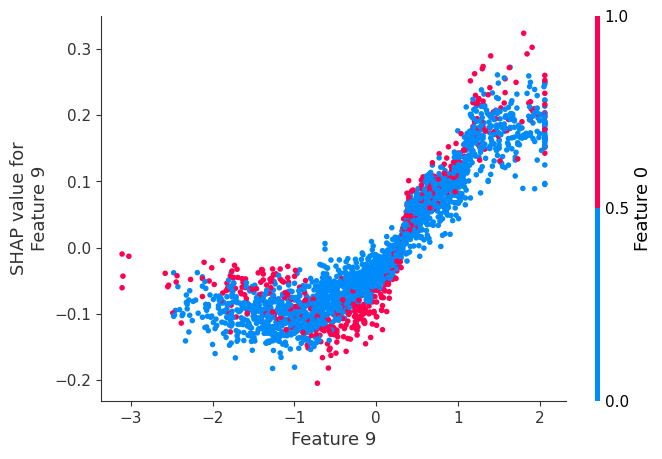

In [136]:
# Dependence plot para ver o impacto de uma feature específica
shap.dependence_plot("Feature 9", shap_values, X_test)

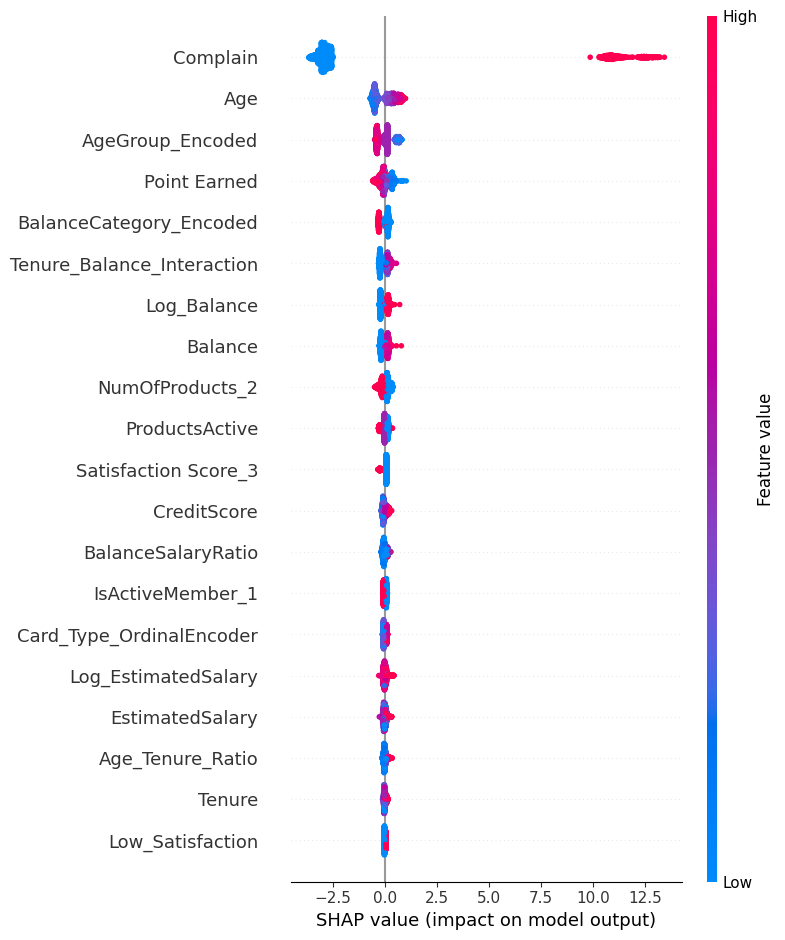

In [137]:
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

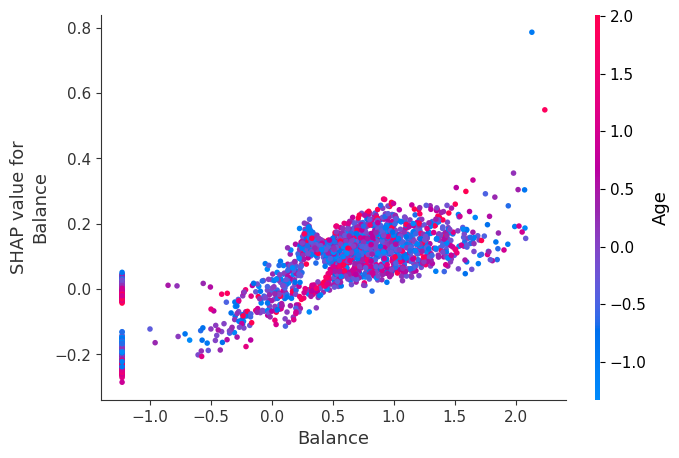

In [138]:
shap.dependence_plot("Balance", shap_values, X_test, feature_names=feature_names, interaction_index="Age")

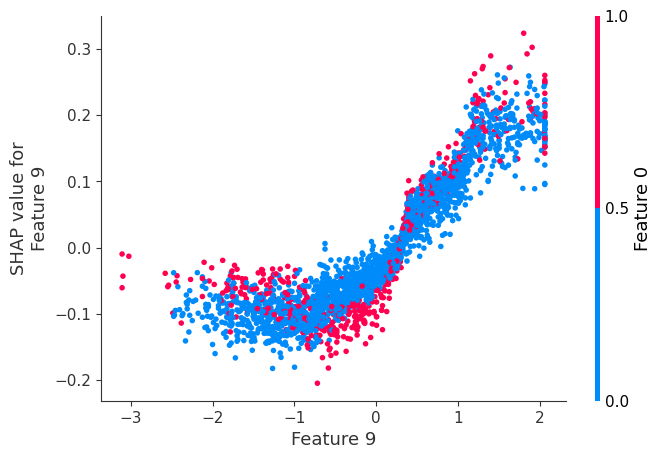

In [139]:
shap.dependence_plot("Feature 9", shap_values, X_test)

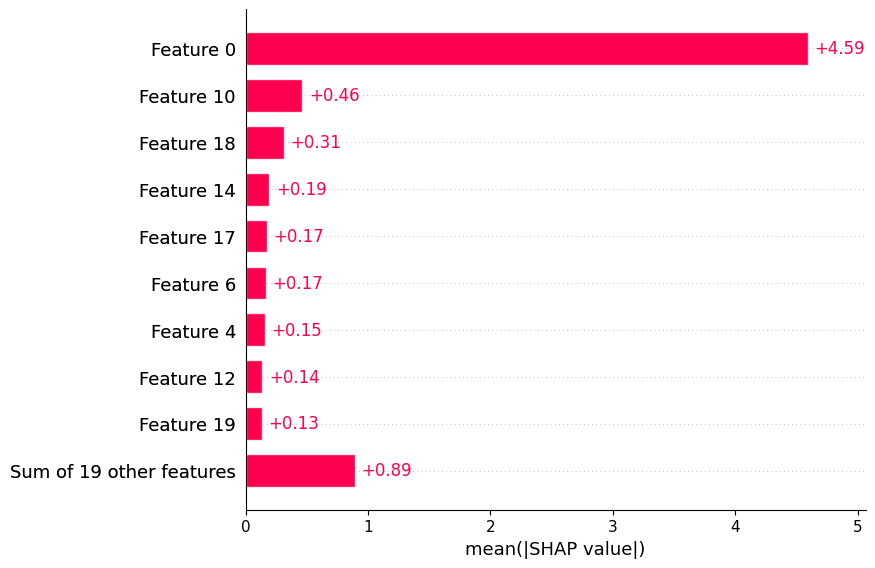

In [140]:
# shap.bar_plot(shap_values)
shap_values = explainer(X_test)
shap.plots.bar(shap_values)

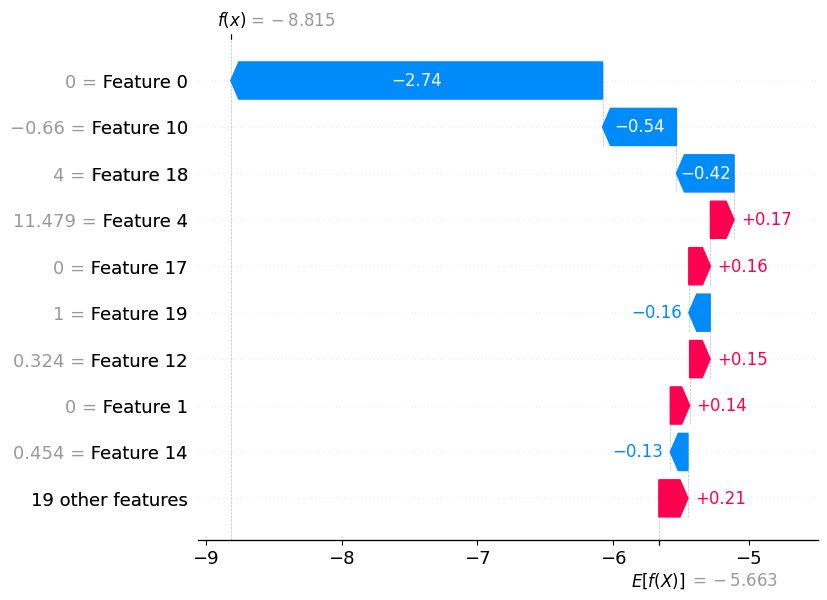

In [141]:
shap.waterfall_plot(shap_values[0])

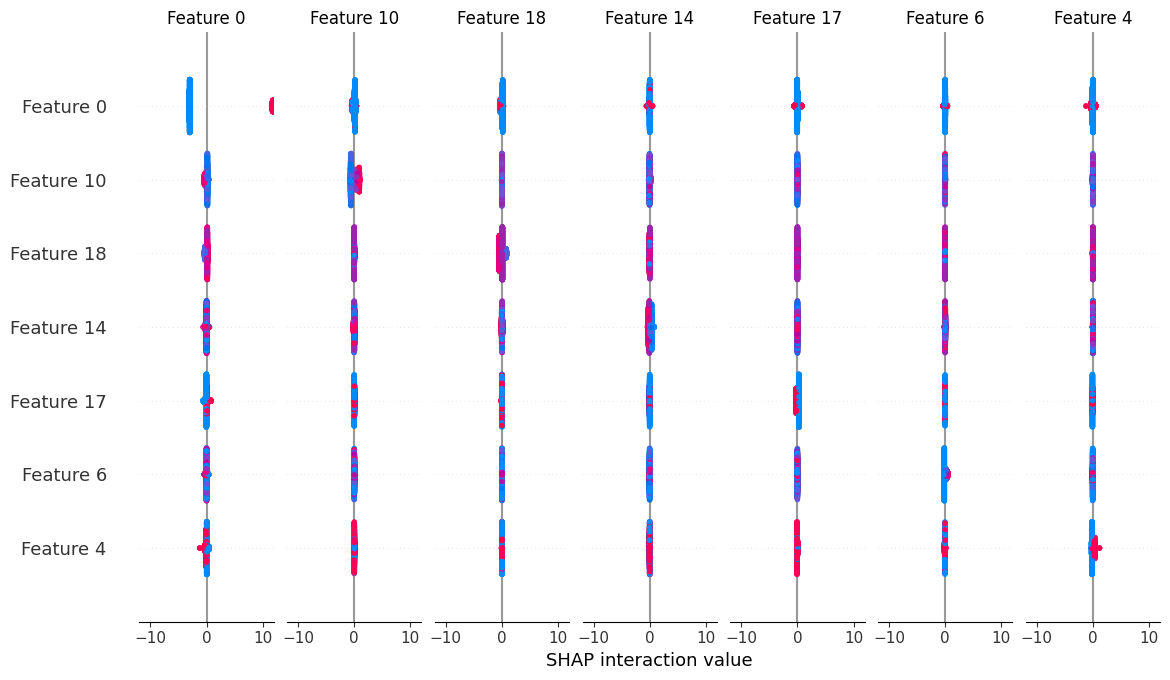

In [142]:
shap_interaction_values = explainer.shap_interaction_values(X_test)
shap.summary_plot(shap_interaction_values, X_test)

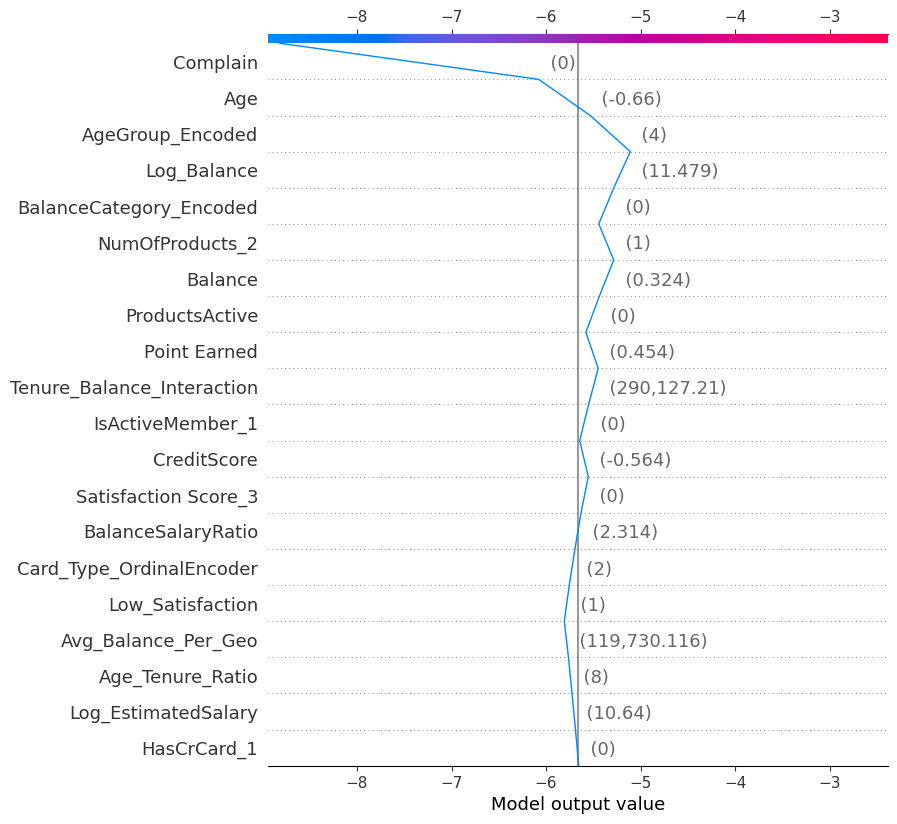

In [143]:
# Se você estiver usando CatBoost, como parece ser o caso:
shap_values = explainer(X_test)  # Gera os valores SHAP para o conjunto de teste
# Acessar os valores SHAP como array NumPy
shap_values_np = shap_values.values  # Extrai os valores shap como array

# Agora, crie o gráfico de decisão para uma instância
shap.decision_plot(explainer.expected_value, shap_values_np[0], X_test_df.iloc[0])